In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
# Load the trained model 
model = torch.load('./here/output/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [3]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./here/output/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

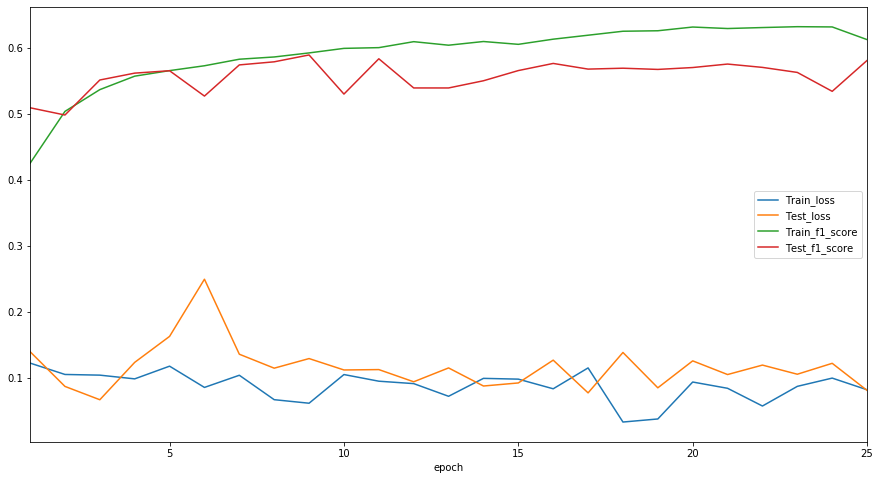

In [4]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [5]:
# print(df[['Train_auroc','Test_auroc']].max())

### Sample Prediction

In [7]:
ino = 2
# Read  a sample image and mask from the data-set
# img = cv2.imread(f'./CrackForest/Images/{ino:03d}.jpg').transpose(2,0,1).reshape(1,3,320,480)
# mask = cv2.imread(f'./CrackForest/Masks/{ino:03d}_label.PNG')
img = cv2.imread('./here/cleanImages/Images/134406tileX_194915tileY_0302222310302200132quadKey_19zoomLevel_5XStitchStride_5YStitchStride.png').transpose(2,0,1).reshape(1,3,224,224)
mask = cv2.imread('./here/cleanImages/Masks/134406tileX_194915tileY_0302222310302200132quadKey_19zoomLevel_5XStitchStride_5YStitchStride.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.FloatTensor)/255)

(array([  322.,  5550., 13106.,  8884.,  6324.,  4564.,  3596.,  2973.,
         2886.,  1971.]),
 array([-0.25162467, -0.12700275, -0.00238081,  0.12224112,  0.24686305,
         0.371485  ,  0.49610692,  0.62072885,  0.7453508 ,  0.8699727 ,
         0.99459463], dtype=float32),
 <a list of 10 Patch objects>)

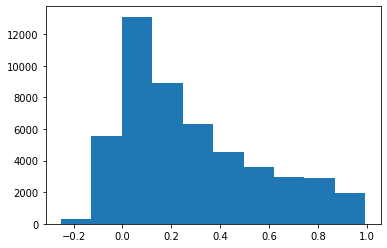

In [8]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

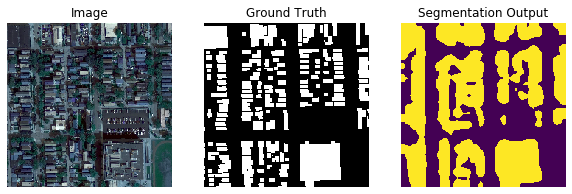

In [9]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2);
plt.title('Segmentation Output')
plt.axis('off');
plt.savefig('./here/output/SegmentationOutput.png',bbox_inches='tight')